In [12]:
%matplotlib inline               
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import os
import re
from google.colab import drive
drive.mount('/content/gdrive')
path ='/content/gdrive/My Drive/deep_learning_group_7/Final/'
os.chdir(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def create_plots(result):
  val_psnr = []
  epoch_loss = []
  val_loss = []
  nums = re.compile(r"\d+(?:\.\d+)?(?:[eE][+-]?\d+)?")

  folder = path + '/' + result
  files = os.listdir(folder)
  for file in files:
    if file.endswith('validation_psnr.npy'):
      val_psnr.append(file)
    elif file.endswith('epoch_loss_list.npy'):
      epoch_loss.append(file) 
    elif file.endswith('val_loss_list.npy'):
      val_loss.append(file) 

  val_psnr.sort()
  epoch_loss.sort()
  val_loss.sort()

  matplotlib.rcParams['figure.figsize'] = [30, 10]

  fig, axs = plt.subplots(1, 2)
  # fig.suptitle('Hyperparameter tuning for different {}'.format(hyperparam))

  # Validation PSNR

  for file in val_psnr:
    axs[0].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
  axs[0].set_xlabel('Number of Epochs', fontsize=20)
  axs[0].set_ylabel('Validation PSNR [dB]', fontsize=20)

  # Epoch and validiation loss
  for file in epoch_loss:
    axs[1].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
  for file in val_loss:
    axs[1].plot(np.load(folder+'/'+file), label = nums.search(file).group(0))
  axs[1].set_xlabel('Number of Epochs', fontsize=20)
  axs[1].set_ylabel('Epoch loss', fontsize=20)
  axs[1].set_yscale('log')
  axs[1].legend(['training','validation'], fontsize=20)

  plt.show()

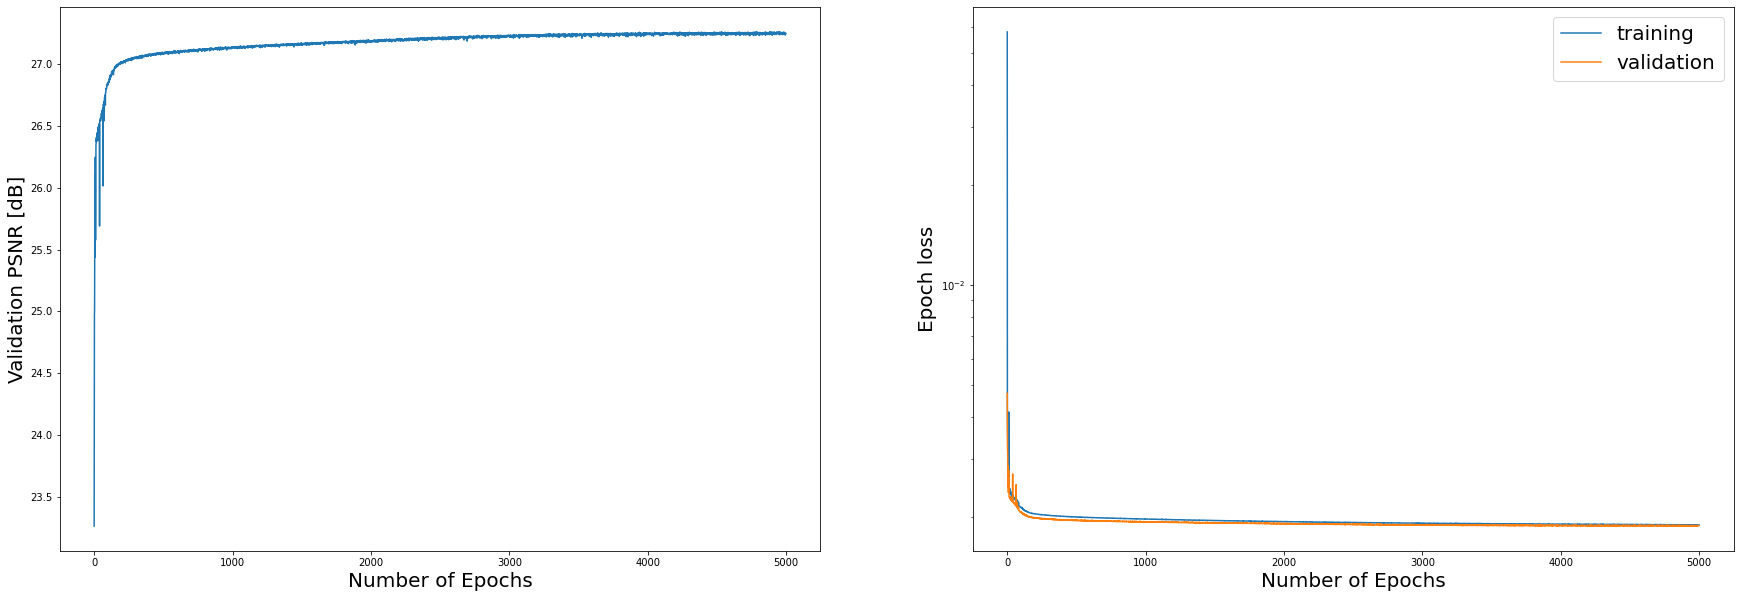

In [20]:
create_plots('training_results')